In [10]:
import pandas as pd
from sklrean.tree import DecisionTreeRegressor
from sklrean.ensemble import RandomForestRegressor
import numpy as np

ModuleNotFoundError: No module named 'sklrean'

In [11]:
bike = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

<AxesSubplot:xlabel='hour'>

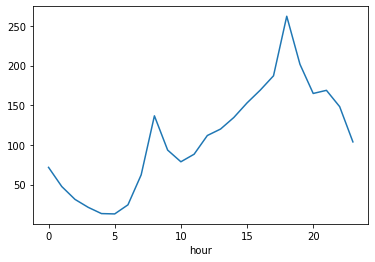

In [12]:
bike.groupby('hour').mean()['count'].plot()

In [13]:
import matplotlib.pyplot as plt

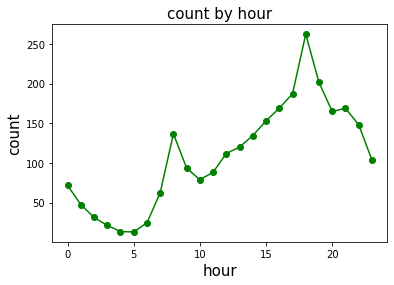

In [19]:
plt.plot(bike.groupby('hour').mean()['count'], 'go-')

plt.title('count by hour', fontsize=15)
plt.xlabel('hour', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.savefig('countbyhour.png')

In [20]:
import seaborn as sns

<AxesSubplot:>

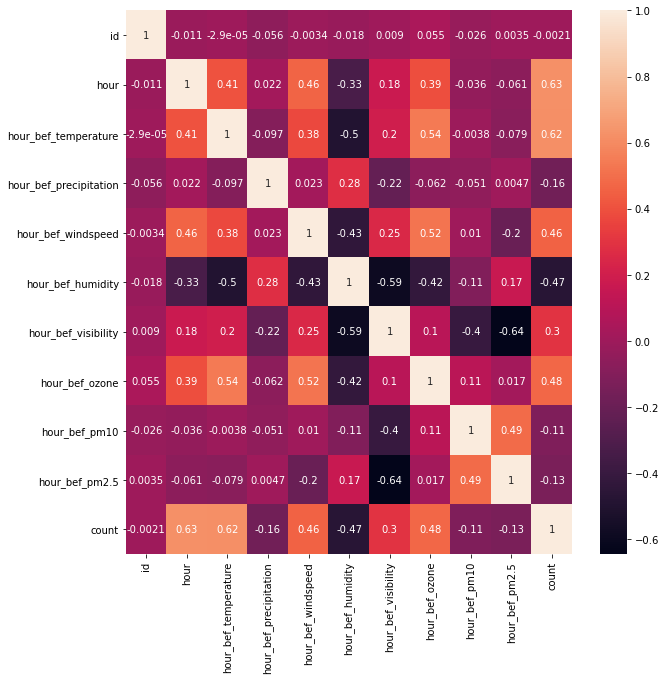

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(bike.corr(),annot=True)